# Non Graded Challenge 12

# Inferential

Nama : Raditya Saputra

Batch : 007 FTDS

# Soal :

- Lakukan hypothesis testing terhadap dataset 'fix_clean_inferential_covid_indo.csv'
- Ambil kesimpulan dari hasil analisa dataset 'fix_clean_inferential_covid_indo.csv'
- Sebelumnya dataset berikut sudah di handling pada non graded challenge 11

# Library yang digunakan :

In [1]:
import pandas as pd
from scipy import stats # untuk p value
import numpy as np
import matplotlib.pyplot as plt # visualisasi
import seaborn as sns # visualisasi

# Load data

In [2]:
df = pd.read_csv('fix_clean_inferential_covid_indo.csv')

In [3]:
# menampilkan seluruh kolom data
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,0.99,1.0
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,Riau,Indonesia,Asia,Sumatera,UTC+07:00,Daerah,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,0.99,1.0
3,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,1591.0,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
4,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,8,-8,Province,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,Daerah,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,0.99,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21117 entries, 0 to 21116
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21117 non-null  object 
 1   Location ISO Code            21117 non-null  object 
 2   Location                     21117 non-null  object 
 3   New Cases                    21117 non-null  int64  
 4   New Deaths                   21117 non-null  int64  
 5   New Recovered                21117 non-null  int64  
 6   New Active Cases             21117 non-null  int64  
 7   Total Cases                  21117 non-null  int64  
 8   Total Deaths                 21117 non-null  int64  
 9   Total Recovered              21117 non-null  int64  
 10  Total Active Cases           21117 non-null  int64  
 11  Location Level               21117 non-null  object 
 12  Province                     21117 non-null  object 
 13  Country         

In [6]:
df.rename(
    columns={'Total Cases' : 'Total_Kasus'} , inplace=True
)

# Resampling

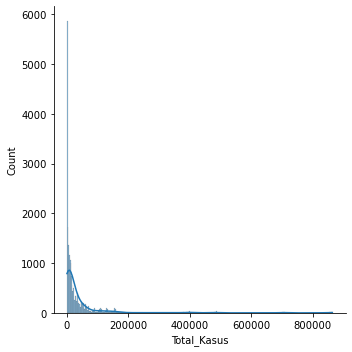

In [7]:
sns.displot(df.Total_Kasus, kde=True, label='Total Kasus di Indonesia')

Sampling

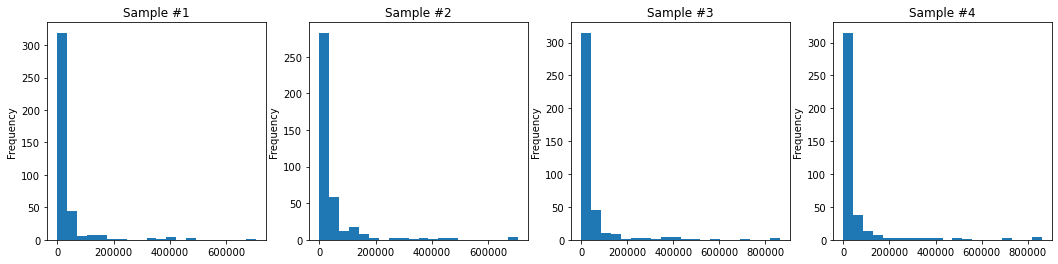

In [8]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  df.Total_Kasus.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

distribusi secara visual mirip mirip, tidak ada yg normal, semua skew

pengambilan sampling dengan menggunakan sintaks diatas sudah tepat, kecuali ada yang normal 1 bentuk beda sendiri, normal..berarti ada masalah pada sintak

# Two sample independent two tailed hipotesis testing

membandingkan suatu kasus pada lokasi tertentu Sumatera Utara dan DKI Jakarta

In [11]:
total_sumut = df[df['Location']=='Sumatera Utara'][['Date','Total_Kasus']].groupby('Date').sum()
total_dki_j = df[df['Location']=='DKI Jakarta'][['Date','Total_Kasus']].groupby('Date').sum()

print('Average cases of Sumatera Utara a day: {}'.format(np.round(total_sumut.Total_Kasus.mean())))
print('Average cases of DKI Jakarta a day: {}'.format(np.round(total_dki_j.Total_Kasus.mean())))

Average cases of Sumatera Utara a day: 32531.0
Average cases of DKI Jakarta a day: 324913.0


Our hypothesis on this case:

H0: μ_sumut = μ_dki

H1: μ_sumut != μ_dki

In [12]:
t_stat, p_val = stats.ttest_ind(total_sumut,total_dki_j)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 8.44870106781152e-97
t-statistics: -22.816378587679615


p value < cv (critical value)

8.4...e-97 yang berarti 10 pangkat -97 sehingga nilai nya sangat kecil dari 0.05 critical value. jadi, p value yang didapatkan kurang dari critical value yang berarti h0 ditolak.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


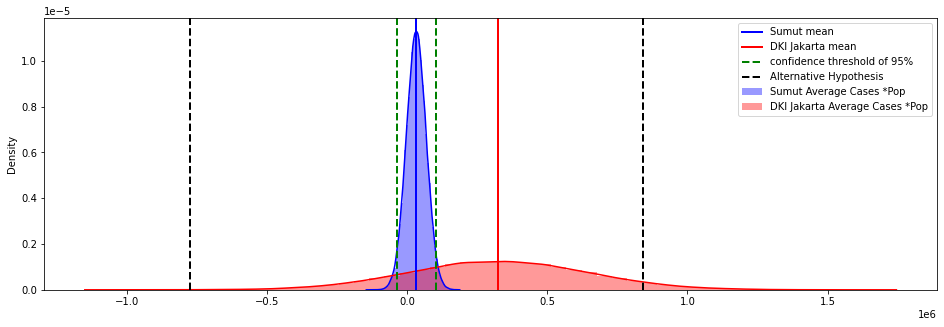

In [14]:
sumut_pop = np.random.normal(total_sumut.Total_Kasus.mean(),total_sumut.Total_Kasus.std(),100000)
dki_j_pop = np.random.normal(total_dki_j.Total_Kasus.mean(),total_dki_j.Total_Kasus.std(),100000)

ci = stats.norm.interval(0.95, total_sumut.Total_Kasus.mean(), total_sumut.Total_Kasus.std())
plt.figure(figsize=(16,5))
sns.distplot(sumut_pop, label='Sumut Average Cases *Pop',color='blue')
sns.distplot(dki_j_pop, label='DKI Jakarta Average Cases *Pop',color='red')

plt.axvline(total_sumut.Total_Kasus.mean(), color='blue', linewidth=2, label='Sumut mean')
plt.axvline(total_dki_j.Total_Kasus.mean(), color='red',  linewidth=2, label='DKI Jakarta mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(sumut_pop.mean()+t_stat[0]*sumut_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(sumut_pop.mean()-t_stat[0]*sumut_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Hal ini juga dapat dilihat dari plotnya. Garis hitam berada diluar garis biru dan hijau. Kalau H0 diterima, garis hitam akan berada diantara garis mean (biru) dan garis confidence interval (hijau)

# Kesimpulan

Berdasarkan hasil di atas, kita dapat menyimpulkan bahwa kita menolak hipotesis nol dikarenakan untuk mendukung h0 diterima kurang, sehingga h1 di terima. karena itu antara sumatera utara dan DKI Jakarta berbeda secara signifikan dalam hal total kasus covid 